# Introduction to Principal Component Analysis

Contributers: Linghao Don, Josh Beck, Jose Figueroa, Yuvraj Chopra

## Sections:

- [PCA (Principal Component Analysis)](#PCA-(Principal-Component-Analysis))
- [Origin](#Origin)
- [Learning Objective](#Learning-Objective)
- [PCA ](#PCA-)
- [Eigenvectors](#Eigenvectors)
- [Running PCA](#Running-PCA)
- [Homework](#Homework)

## Origin
- - - - - --  -
This notebook was adapted from amueller's notebook, "1 - PCA". Here is the link to his repository https://github.com/amueller/tutorial_ml_gkbionics.git .

We add few explanation about eigenvalue and comments for the code.


## Learning Objective
- - - - - -
1. How the Principal Componenet Analysis(PCA) works.
2. How PCA can be used to do dimensionality reduction.
3. Understand how PCA deal with the covariance matrix by applying eigenvector. 

# PCA 
- - - - -- 
PCA always be used to simplify the data with high dimention(larger than 2) into 2-dimention by eliminating the one has least influnce on data. However, we should knwow the elimination of data makes the independent variable less interpretable. Before we starts to deal with the PCA, we need to first learn how PCA utilize eigenvectors to gain a diagonalization covariance matrix.

# Eigenvectors
- - - - - - - 
Eigenvectors and eigenvalues are the main tools used by PCA to obtain a diagnolization covariance matrix. The eigenvector is a vector whoes direction will not be affected by the linear transformation, hence eigenvectors represents the direction of largest variance of data while the eigenvalue decides the magnitude of this variance in those directions.

Here we using a simple (2x2) matrix A to explain it.
$$
A = \begin{bmatrix}
1 & 4 \\
3 & 2 
\end{bmatrix}
$$

In [1]:
# importing class
import sympy as sp
import numpy as np
import numpy.linalg as lg
A = np.matrix([[1,4],[3,2]])

In general,we set the eigenvector $v$ of a matrix $A$ is the vector for the following holds:
$$
Av = \lambda v
$$
for which $\lambda$ stands for the eigenvalue such that linear transformation on $v$ can be defined by $\lambda$

Also, we can solve the equation by:
$$
Av - \lambda v = 0 \\
v(A-\lambda I) = 0
$$
While $I$ is the identity matrix of A 

$$
I = A^TA = AA^T
$$
In this case, if $v$ is none-zero vector than $Det(A - \lambda I) = 0$, since it cannot be invertible, and we can solve $v$ for $A$ denpends on this relationship.
$$
I = \begin{bmatrix} 
1 & 0 \\
0 & 1 
\end{bmatrix} \\
$$


In [2]:
def solveLambda(A = A,Lambda = sp.symbols("Lambda", real = True) ):
    I = A*A.I
    I = np.around(I, decimals =0)
    return (A - Lambda*I)
Lambda = sp.symbols("Lambda", real = True)
B = solveLambda(A = A, Lambda = Lambda)
B

matrix([[-1.0*Lambda + 1, 4],
        [3, -1.0*Lambda + 2]], dtype=object)

$$
(A - \lambda I) = \begin{bmatrix}
1-\lambda & 4 \\
3 & 2 - \lambda 
\end{bmatrix} \\
$$

To solve the $\lambda$ we can use the function solve in sympy or calculating.

In [3]:
function = Lambda**2 - 3*Lambda - 10
answer = sp.solve(function, Lambda)
answer

[-2, 5]

In this case, $\lambda_1 = -2$ and $\lambda_2 = 5$, and we can figure out the eigenvectors in two cases.

For $\lambda_1 = -2$

In [4]:
identity = np.identity(len(A))
eigenvectors_1 = A - answer[0]*identity
eigenvectors_1

matrix([[3.00000000000000, 4],
        [3, 4.00000000000000]], dtype=object)

Based on the matrix we can infer the eigenvector can be
$$
v_1 = \begin{bmatrix}
-4 \\
3\end{bmatrix}
$$

For $\lambda = 5$

In [5]:
eigenvectors_2 = A - answer[1]*identity
eigenvectors_2 

matrix([[-4.00000000000000, 4],
        [3, -3.00000000000000]], dtype=object)

Based on the matrix we can infer the eigenvector can be
$$
v_2 = \begin{bmatrix}
1\\
1\end{bmatrix}
$$
All in all, the covariance matrix $A'$ now can be:
$$
A' = v * A \\
$$

Such that we can obtain the matrix $V$
$$
V = \begin{bmatrix}
-4 & 1 \\
3 & 1 
\end{bmatrix}
$$
where $A' = V^{-1} A V$ for the diagnalization:

In [6]:
V = np.matrix([[-4,1],[3,1]])
diagnalization = V.I * A * V
diagnalization

matrix([[-2.00000000e+00,  0.00000000e+00],
        [-1.77635684e-15,  5.00000000e+00]])

Hence, the diagonalization covariance matrix is 
$$
\begin{bmatrix}
-2 & 0\\
0 & 5 
\end{bmatrix}
$$
Luckily, PCA can do all of this by applyng the function `pca.fit_transform(x)` and `np.cov()`

Generating Data
===============

To talking about PCA, we first create 200 random two-dimensional data points and have a look at the raw data.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)
X  

array([[ 2.62364351e+00,  2.10370708e+00],
       [-1.91025496e-02,  2.42991167e+00],
       [-5.60107494e-01, -4.10259748e-01],
       [-6.32195479e-01,  5.89253717e+00],
       [ 7.52729913e-01,  1.80252309e+00],
       [ 8.20781292e-02,  8.79639390e-01],
       [-7.32367585e-01,  2.03419882e+00],
       [ 2.65013657e+00,  1.12777575e+00],
       [-1.61783553e+00,  7.36520827e+00],
       [ 2.21686075e+00, -2.14132485e+00],
       [ 1.02507984e+00,  3.71090460e+00],
       [ 2.01843251e+00,  1.25413001e-01],
       [ 4.87357469e+00, -1.92575097e+00],
       [ 1.96367563e+00, -1.60396910e-01],
       [ 4.23598637e+00,  1.52062334e+00],
       [-4.84681565e-01,  3.50304191e+00],
       [-3.81700000e-01,  4.22484489e+00],
       [ 1.61470578e+00,  1.12129153e+00],
       [-7.17018757e-02,  6.58468178e+00],
       [-1.19223721e+00,  3.84021882e+00],
       [ 1.14638807e+00,  9.81593809e-01],
       [ 5.26048154e-01,  3.92666814e+00],
       [-8.09881985e-01,  4.39230969e+00],
       [-5.

In [8]:
np.set_printoptions(4, suppress=True) # show only four decimals
print (X[:10,:]) # print the first 10 rows of X (from 0 to 9)

[[ 2.6236  2.1037]
 [-0.0191  2.4299]
 [-0.5601 -0.4103]
 [-0.6322  5.8925]
 [ 0.7527  1.8025]
 [ 0.0821  0.8796]
 [-0.7324  2.0342]
 [ 2.6501  1.1278]
 [-1.6178  7.3652]
 [ 2.2169 -2.1413]]


We round the whole data for only 4 decimals.

However, there is no obvious relationship based on this 2-dimensional data, hence we plot it.

(-4.88366887455786, 6.399808387551091, -5.774908946895555, 9.214406198107946)

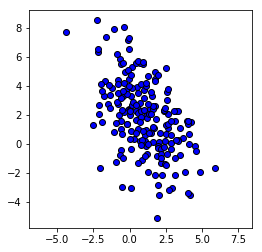

In [9]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c= "b", edgecolor = "black")
plt.axis('equal') # equal scaling on both axis;

We can have a look at the actual covariance matrix,as well:

In [10]:
print (np.cov(X,rowvar=False))

[[ 2.9295 -2.1465]
 [-2.1465  6.4346]]


# Running PCA
- - -- - -- - -
We would now like to analyze the directions in which the data varies most. For that, we 

1. place the point cloud in the center (0,0) and
2. rotate it, such that the direction with most variance is parallel to the x-axis.

Both steps can be done using PCA, which is conveniently available in sklearn.

We start by loading the PCA class from the sklearn package and creating an instance of the class:

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

Now, `pca` is an object which has a function `pca.fit_transform(x)` which performs both steps from above to its argument `x`, and returns the centered and rotated version of `x`.

In [12]:
X_pca = pca.fit_transform(X)

In [13]:
pca.components_

array([[-0.4287,  0.9034],
       [-0.9034, -0.4287]])

In [14]:
pca.mean_

array([0.9769, 1.8955])

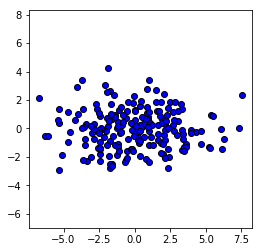

In [15]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1],c = "b", edgecolor = "black")
plt.axis('equal');

The covariances between different axes should be zero now. We can double-check by having a look at the non-diagonal entries of the covariance matrix:

In [16]:
print (np.cov(X_pca, rowvar=False))

[[ 7.4532 -0.    ]
 [-0.      1.911 ]]


High-Dimensional Data
=====================

Our small example above was very easy, since we could get insight into the data by simply plotting it. This approach will not work once you have more than 3 dimensions, Let's use the famous iris dataset, which has 4 dimensions:
 * Sepal Length
 * Sepal Width
 * Pedal Length
 * Pedal Width

In [17]:
from io import open
data = open('bezdekIris.data', 'r').readlines()
iris_HD = np.matrix([np.array(val.split(',')[:4]).astype(float) for val in data[:-1]])

Lets look at the data again. First, the raw data:

In [18]:
print (iris_HD[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


We can also try plot a few two-dimensional projections, with combinations of 2 features at a time:

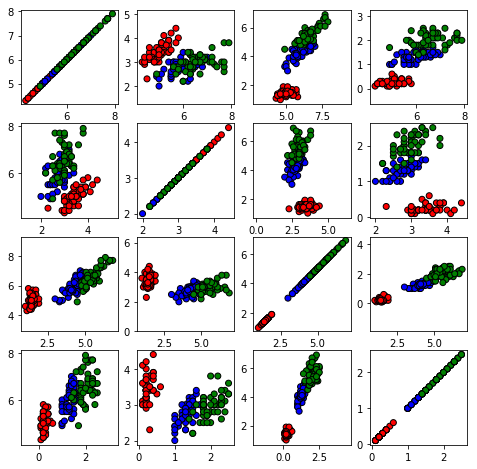

In [19]:
colorClass = [val.split(',')[-1].replace('\n', '') for val in data[:-1]]
for i in range(len(colorClass)):
    val = colorClass[i]
    if val == 'Iris-setosa':
        colorClass[i] ='r'
    elif val == 'Iris-versicolor':
        colorClass[i] ='b'
    elif val == 'Iris-virginica':
        colorClass[i] ='g'

plt.figure(figsize=(8,8))
for i in range(0,4):
    for j in range(0,4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(iris_HD[:,i].tolist(), iris_HD[:,j].tolist(),c = colorClass, edgecolors = "black")
        plt.axis('equal')
        plt.gca().set_aspect('equal')

It is not easy to see that this is still a two-dimensional dataset! 

However, if we now do PCA on it, you'll see that the last two dimensions do not matter at all:

In [20]:
X_HE = pca.fit_transform(iris_HD)
print (X_HE[:10,:])

[[-2.6841  0.3194 -0.0279 -0.0023]
 [-2.7141 -0.177  -0.2105 -0.099 ]
 [-2.889  -0.1449  0.0179 -0.02  ]
 [-2.7453 -0.3183  0.0316  0.0756]
 [-2.7287  0.3268  0.0901  0.0613]
 [-2.2809  0.7413  0.1687  0.0242]
 [-2.8205 -0.0895  0.2579  0.0481]
 [-2.6261  0.1634 -0.0219  0.0453]
 [-2.8864 -0.5783  0.0208  0.0267]
 [-2.6728 -0.1138 -0.1976  0.0563]]


Here it is easy to see, that the data is **still only two-dimensional**. Let's plot the two dimensions.

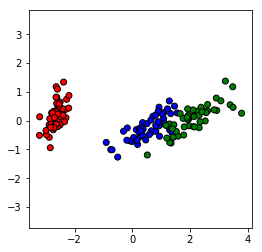

In [21]:
plt.figure(figsize=(4,4))
plt.scatter(X_HE[:,0], X_HE[:,1], c = colorClass, edgecolor = "black")
plt.axis('equal')
plt.gca().set_aspect('equal')

Why does the result look differently than the two-dimensional data from which we generated it?

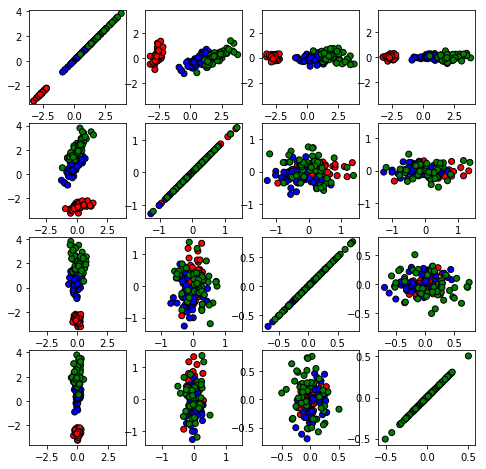

In [22]:
plt.figure(figsize=(8,8))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_HE[:,i], X_HE[:,j], c = colorClass, edgecolor = "black")
        plt.gca().set_xlim(-40,40)
        plt.gca().set_ylim(-40,40)
        plt.axis('equal')
        plt.gca().set_aspect('equal')

Dimension Reduction with PCA
============================

We can see that there are actually only two dimensions in the dataset. 

Let's throw away even more data -- the second dimension -- and reconstruct the original data in `D`.

In [23]:
pca = PCA(1) # only keep one dimension!
X_E = pca.fit_transform(iris_HD)
print (X_E[:10,:])

[[-2.6841]
 [-2.7141]
 [-2.889 ]
 [-2.7453]
 [-2.7287]
 [-2.2809]
 [-2.8205]
 [-2.6261]
 [-2.8864]
 [-2.6728]]


Now lets plot the reconstructed data and compare to the original data D. We plot the original data in red, and the reconstruction with only one dimension in blue:

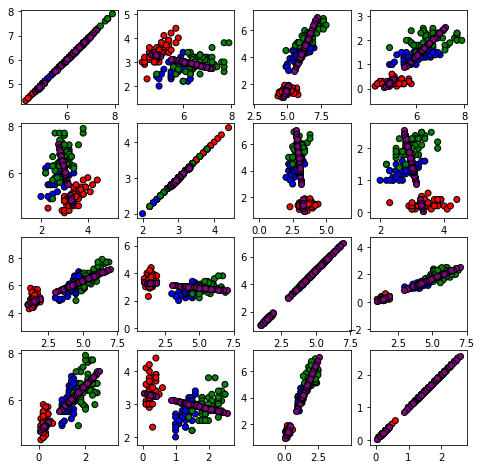

In [30]:
X_reconstructed = pca.inverse_transform(X_E)
plt.figure(figsize=(8,8))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(iris_HD[:,i].tolist(), iris_HD[:,j].tolist(),c=colorClass, edgecolor = "black")
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c='purple', edgecolor = "black")
        plt.axis('equal')

## Homework
- - - - - - --- --- - - - -- -- - - 
1) Do the PCA reduction on the ramdon 6-dimension data and plot it out.

2) Explan what PCA does on your data.

*The code for data are given.

In [ ]:
pca=PCA(6)
DATA = np.dot(X,np.random.uniform(0.2,3,(2,6))*(np.random.randint(0,2,(2,6))*2-1))
DATA

In [ ]:
## Answer:

pca=PCA(6)
DATA = np.dot(X,np.random.uniform(0.2,3,(2,6))*(np.random.randint(0,2,(2,6))*2-1))
DATA2 = pca.fit_transform(DATA)

plt.figure(figsize=(4,4))
plt.scatter(DATA2[:,0], DATA2[:,1], c = "b", edgecolor = "black")
plt.axis('equal')
plt.gca().set_aspect('equal')